In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
train_dir='/content/drive/My Drive/Mask_Datasets/Train'
validation_dir='/content/drive/My Drive/Mask_Datasets/Validation'

In [0]:
model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3)),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3)),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(64),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Activation('sigmoid')               
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [0]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
train_data_gen=ImageDataGenerator(rescale=1/255,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.6,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
validation_data_gen=ImageDataGenerator(rescale=1/255)


In [7]:
train_generator=train_data_gen.flow_from_directory(train_dir,
                                   target_size=(150,150),
                                   batch_size=16,
                                   class_mode='binary',shuffle=True)
validation_generator=validation_data_gen.flow_from_directory(validation_dir,
                                                             batch_size=16,
                                                             target_size=(150,150),
                                                             class_mode='binary',shuffle=True)

Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.90):
      self.model.stop_training=True
callbacks=myCallback()


In [9]:
epochs=100
history=model.fit(train_generator,epochs=epochs,steps_per_epoch=47,callbacks=[callbacks],validation_data=validation_generator)

Epoch 1/100
47/47 [==============================] - 879s 19s/step - loss: 0.6985 - accuracy: 0.7027 - val_loss: 0.3406 - val_accuracy: 0.8743
Epoch 2/100
47/47 [==============================] - 30s 635ms/step - loss: 0.4884 - accuracy: 0.7867 - val_loss: 0.2354 - val_accuracy: 0.9229
Epoch 3/100
47/47 [==============================] - 30s 640ms/step - loss: 0.4077 - accuracy: 0.8253 - val_loss: 0.1751 - val_accuracy: 0.9429
Epoch 4/100
47/47 [==============================] - 29s 626ms/step - loss: 0.3428 - accuracy: 0.8533 - val_loss: 0.1603 - val_accuracy: 0.9514
Epoch 5/100
47/47 [==============================] - 30s 629ms/step - loss: 0.3568 - accuracy: 0.8520 - val_loss: 0.1858 - val_accuracy: 0.9343
Epoch 6/100
47/47 [==============================] - 30s 631ms/step - loss: 0.3468 - accuracy: 0.8640 - val_loss: 0.1999 - val_accuracy: 0.9229
Epoch 7/100
47/47 [==============================] - 30s 629ms/step - loss: 0.2774 - accuracy: 0.8947 - val_loss: 0.1557 - val_accuracy: 

Text(0.5, 1.0, 'Training and validation loss')

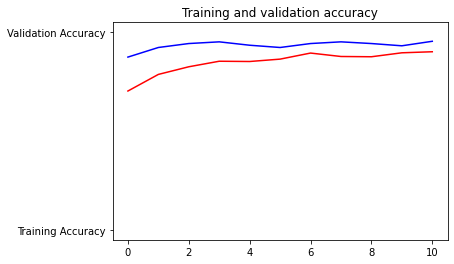

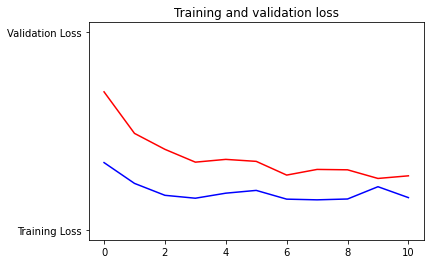

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [14]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is not wearing a mask")
    
  else:
    print(fn + " is wearing a mask")

Saving images (24).jfif to images (24).jfif
[0.]
images (24).jfif is wearing a mask


In [0]:
model.save('my_test_model4.h5')

In [0]:
reloaded_model=tf.keras.models.load_model('/content/drive/My Drive/my_test_model4.h5')

In [17]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = reloaded_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is not wearing a mask")
    
  else:
    print(fn + " is wearing a mask")

Saving images (25).jfif to images (25).jfif
[0.]
images (25).jfif is wearing a mask


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


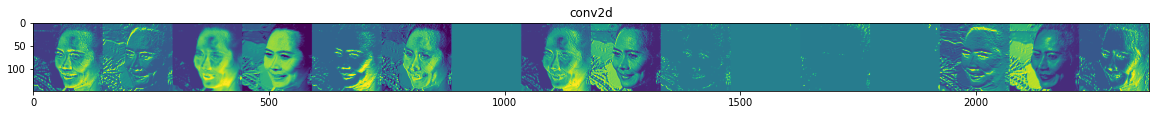

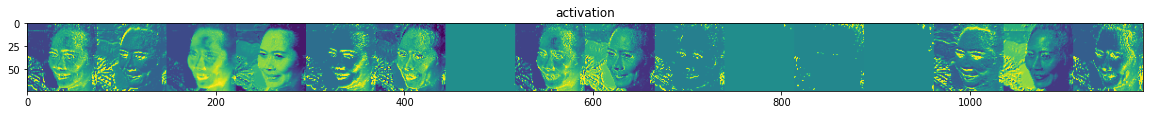

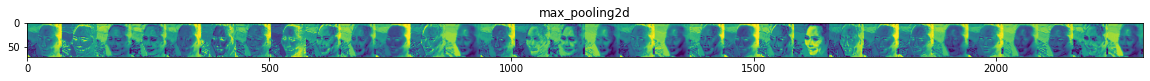

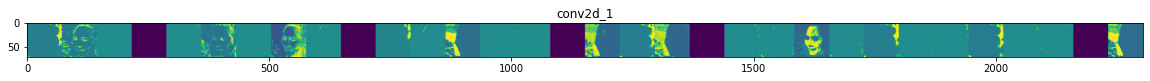

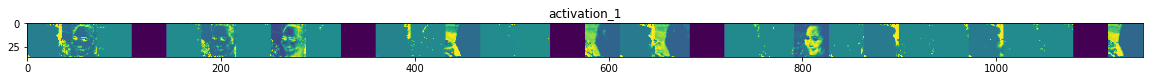

In [18]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
from matplotlib import pyplot as plt

train_mask_fnames=os.listdir('/content/drive/My Drive/Mask_Datasets/Train/Mask')
train_nomask_fnames=os.listdir('/content/drive/My Drive/Mask_Datasets/Train/No_mask')

successive_outputs = [layer.output for layer in reloaded_model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = reloaded_model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
mask_img_files = [os.path.join('/content/drive/My Drive/Mask_Datasets/Train/Mask', f) for f in train_mask_fnames]
nomask_img_files = [os.path.join('/content/drive/My Drive/Mask_Datasets/Train/No_mask', f) for f in train_nomask_fnames]

img_path = random.choice(mask_img_files+nomask_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image



x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in reloaded_model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 